In [3]:
import matplotlib.pylab as plt
import matplotlib.animation as animation
from Models import *
plt.rcParams['animation.ffmpeg_path'] = u"/usr/bin/ffmpeg"
%matplotlib notebook

In [ ]:
INTERACTION_ENERGY = 1.0

In [ ]:
lattice = SpinLattice.build1d_random(8, 8)
runner = SimulationRunner(model='Ising', temperature=0.2, magnetic_field=None, epoch=10000)
results = runner.run(lattice, verbose=True)

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,6))
fig.tight_layout()
ax[0].set_title('Convergence of energy')
ax[0].plot(results.energy(None, 0, -1), color='tab:red')
ax[1].set_title('Convergence of magnetization')
ax[1].plot(results.magnetization(0, -1), color='tab:green')
plt.show()

In [ ]:
results.visualize(0, 6000)

In [ ]:
temperatures = np.arange(0.01, 4, 0.2)
resultsT = list()
for temperature in tqdm(temperatures):
    runner = SimulationRunner(model='Ising', temperature=temperature, magnetic_field=None, epoch=10000)
    resultsT.append(runner.run(lattice, verbose=False))

In [ ]:
E_ls = [np.mean(res.energy(None,1000, -1)) for res in resultsT]
M_ls = [np.mean(res.magnetization(1000, -1)) for res in resultsT]

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,6))
fig.tight_layout()
ax[0].set_title('Energy from T')
ax[0].plot(temperatures, E_ls, color='tab:red')
ax[1].set_title('Magnetization from T')
ax[1].plot(temperatures, M_ls, color='tab:green')
plt.show()

In [4]:
big_lattice = SpinLattice.build1d_random(64, 64)
runner = SimulationRunner(model='Ising', temperature=0.5, magnetic_field=None, epoch=10000)
big_results = runner.run(big_lattice, verbose=True)

Running: 100%|██████████| 10000/10000 [18:43<00:00,  8.90it/s]


<IPython.core.display.Javascript object>


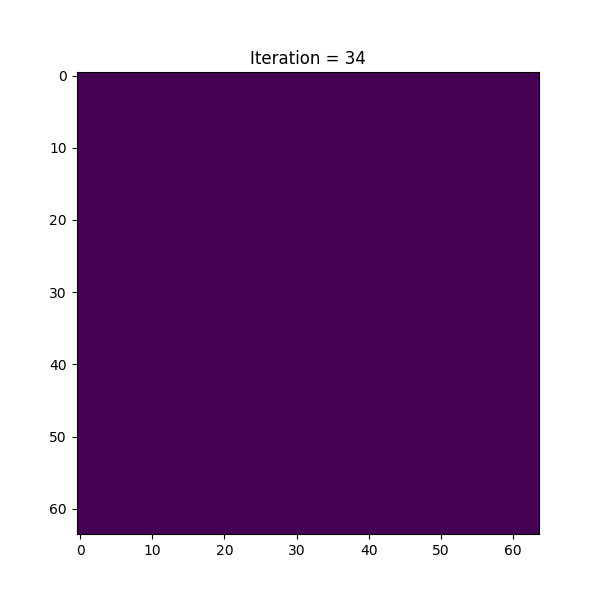

In [7]:
anim = big_results.visualize(0, 10000)

<IPython.core.display.Javascript object>


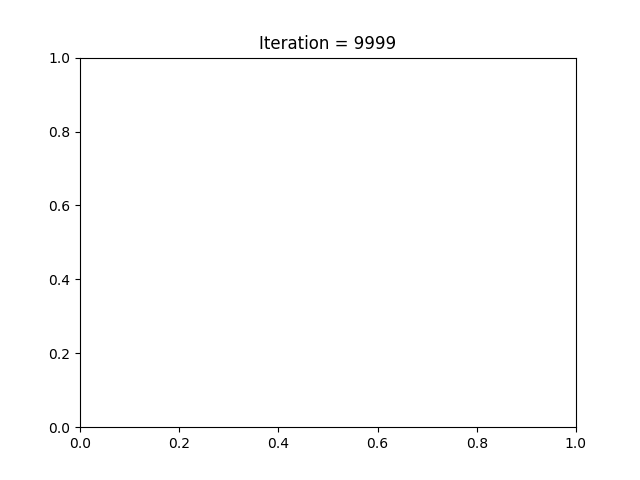

In [8]:
FFwriter = animation.FFMpegWriter(fps=60, extra_args=['-vcodec', 'libx264'])
anim.save('Ising64x64_J1_T05.mp4', writer = FFwriter)

<IPython.core.display.Javascript object>


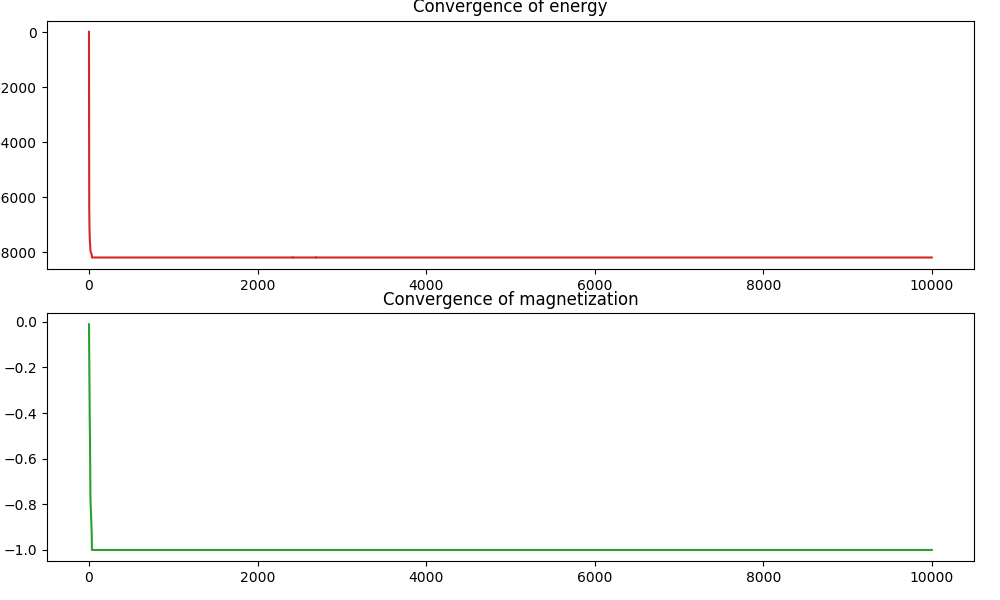

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(10,6))
fig.tight_layout()
ax[0].set_title('Convergence of energy')
ax[0].plot(big_results.energy(None, 0, -1), color='tab:red')
ax[1].set_title('Convergence of magnetization')
ax[1].plot(big_results.magnetization(0, -1), color='tab:green')
plt.show()